In [1]:
pip install tensorflow pydot graphviz

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import tensorflow as tf
import numpy as np
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard

# Set up the log directory for TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [3]:
def sgn(x):
    condition = tf.greater(x, 0)
    condition_equal = tf.equal(x, 0)
    return tf.where(condition, 1.0, tf.where(condition_equal, 0.0, -1.0))

In [14]:
# Define the model
model = Sequential([
    Dense(units=2, activation=sgn, input_shape=(2,)),  # Hidden layer with 2 neurons
    Dense(units=1, activation=sgn)  # Output layer with 1 neuron
])

weights_hidden = np.array([[1, -1], [-1, 1]])
biases_hidden = np.array([-1, -1])

weights_output = np.array([[1], [1]])
biases_output = np.array([-1])


model.layers[0].set_weights([weights_hidden, biases_hidden])
model.layers[1].set_weights([weights_output, biases_output])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

# EXPECTED OUTPUT
input_data = np.array([[-1, -1]])
print(model.predict(input_data))



# Training data
input_data = np.array([[-1, -1]])
target_data = np.array([[1]])

# Train the model for a single epoch
model.fit(input_data, target_data, epochs=1, callbacks=[tensorboard_callback])


print (model.layers[0].get_weights())
print (model.layers[1].get_weights())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 22ms/step
[[-1.]]


ValueError: in user code:

    File "/Users/janishuser/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/Users/janishuser/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/janishuser/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/Users/janishuser/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 1154, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/Users/janishuser/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/legacy/optimizer_v2.py", line 601, in minimize
        return self.apply_gradients(grads_and_vars, name=name)
    File "/Users/janishuser/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/legacy/optimizer_v2.py", line 711, in apply_gradients
        grads_and_vars = optimizer_utils.filter_empty_gradients(grads_and_vars)
    File "/Users/janishuser/Library/Python/3.9/lib/python/site-packages/keras/src/optimizers/utils.py", line 77, in filter_empty_gradients
        raise ValueError(

    ValueError: No gradients provided for any variable: (['dense_4/kernel:0', 'dense_4/bias:0', 'dense_5/kernel:0', 'dense_5/bias:0'],). Provided `grads_and_vars` is ((None, <tf.Variable 'dense_4/kernel:0' shape=(2, 2) dtype=float32>), (None, <tf.Variable 'dense_4/bias:0' shape=(2,) dtype=float32>), (None, <tf.Variable 'dense_5/kernel:0' shape=(2, 1) dtype=float32>), (None, <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32>)).


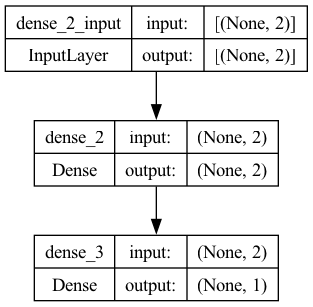

In [11]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image(filename='model_plot.png')

In [15]:
!tensorboard --logdir logs/fit

/Users/janishuser/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.15.1 at http://localhost:6006/ (Press CTRL+C to quit)
W0125 06:18:18.839338 12243972096 application.py:559] path /data/index.js not found, sending 404
^C
